In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
import time, sys
import pylab as pl


#### Esercizi svolti da Stefano Polo

#### Matricola: 940175

#### Informazione sulla cartella contenente codici e risultati:
La struttura della cartella così come è presentata è funzionale per una compilazione semplice del *notebook*. Infatti tutti i risultati delle simulazioni sono disposti nella cartella <span style="color:red"> Risultati </span> catalogati in base all'esercizio. Di conseguenza al fine della compilazione del *notebook* non è necessario rieseguire le simulazioni. Nella cartella <span style="color:red">Codici</span> sono catalogati tutti i codici C++ delle simulazioni di ciascun esercizio. La compilazione e l'esecuzione di quest'ultimi prevede l'automatica sovrascrittura dei file contenenti i risultati su quelli vecchi contenuti nella cartella <span style="color:red"> Risultati</span> (dunque un'esecuzione dei codici non richiede che i nuovi risultati vengano copiati a mano in <span style="color:red"> Risultati</span>). Per eseguire il codice parallelizato con 4 core del "Exercise 10.2" è disponibile il comando <span style="color:green"> make esegui</span>.

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>


### Exercise 10.1

In questa esercitazione viene proposto una nuova tecnica per risolvere il problema del commesso viaggiatore: il *simulated annealing*. Ho implementato tale algoritmo eseguendo un *upgrade* di quello genetico dell'esercitazione 9; il codice si compone delle seguenti fasi:

- vengono distribuite casualmente le posizioni delle città $\vec{x}$ (come per l'esercitazione precedente considera i casi di 30 città disposte su una circonferenza di raggio 1 e 30 città in un quadrato di lato 1) e successivamente permutandole casualmente viene generata la configurazione inizale che può essere formata da un numero variabile di genitori. In entrambi gli esercizi è stato adottato un numero di genitori pari a 1.

- viene eseguito l'algoritmo di Metropolis che genera una nuova possibile configurazione $A$ facendo $N_{m}$ mutazioni della configurazione attuale $B$, cioè facendo $N_{m}$ permutazioni casuali di una coppia di città all'interno del cromosoma (adotto la medesima terminologia usata per l'algoritmo genetico). Questa nuova configurazione viene accettata con probabilità $P$:

$$
P = 1 \quad se \quad L^{(2)}_A(\vec{x}) < L^{(2)}_B(\vec{x})
$$

$$
P = e^{-\beta \left(L^{(2)}_A(\vec{x}) -L^{(2)}_A(\vec{x})\right)} \quad se \quad L^{(2)}_A(\vec{x}) > L^{(2)}_B(\vec{x}) \, ,
$$

dove $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_30) = \sum_{i=1}^{30} |\vec{x}_i-\vec{x}_{i+1}|^2$.

Il Metropolis viene eseguito con un numero di passi $N_{a}$ fissato al variare di $\beta$. Per questo esercizio ho impostato $N_{m} = 1$ così che anche a bassa temperatura fosse possibile per il sistema passare da una configurazione ad una nuova; ciò sarebbe stato estremamente improbaile con tante mutazioni.

L'algoritmo è stato implementato con i seguenti parametri per i due casi:

Disposizione |Iniziale $\beta_{i}$ | Finale $\beta_{f}$ | Passo $\Delta \beta$| Numero campionamenti $N_{a}$
-------|----------|-----------|-----------|-----------|
Circonferenza|0 |60|$10^{-3}$ | $10^3$
Quadrato|0|60| $5\times 10^{-3}$| $10^3$


Nelle celle sottostanti presento i grafici della minima distanza quadratica $L^{(2)}$ in funzione $\beta$ e del miglior percorso del commesso viaggiatore all'ultima generazione. Tali risultati sono mostrati sia per 30 città disposte randomicamente su una circonferenza di raggio 1, sia per 30 città distribuite casualmente in un quadrato di raggio 1.
Si osserva che il miglior percorso nel caso di città disposte nel quadrato ha lunghezza $0.98$ che è minore rispetto a quella ottenuta nell'esercizio 9 ($\sim 1.02$). Invece per quanto riguarda le città disposte su una circonferenza si ha ottenuto $3.23$ che è leggermente più grande di quella del 09.1 ($\sim 3.19$)

Distanza minima quadratica percorsa dal commesso viaggiatore sulla circonferenza:  3.2341


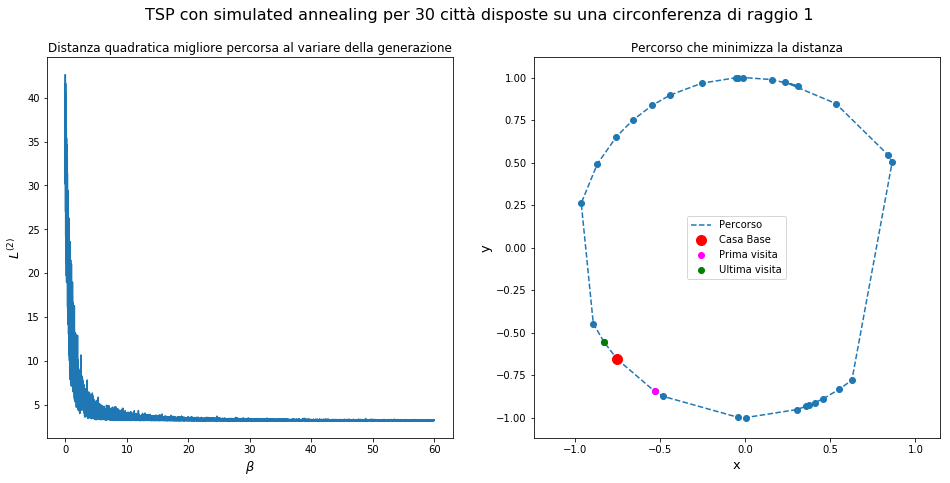

In [2]:
plt.figure(figsize=(16,7))
plt.suptitle('TSP con simulated annealing per 30 città disposte su una circonferenza di raggio 1',fontsize=16) 

plt.subplot(1,2,1)
L = np.loadtxt("Risultati/Exercise_10.1/distance_circ.dat", usecols=(0), unpack='true')
beta = np.linspace(0,60,len(L))
plt.plot(beta,L)
plt.title('Distanza quadratica migliore percorsa al variare della generazione')
plt.xlabel(r"$\beta$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal commesso viaggiatore sulla circonferenza: ', L[len(L)-1])


plt.subplot(1,2,2)
x,y = np.loadtxt("Risultati/Exercise_10.1/path_circ.dat", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Casa Base',color = 'red', zorder = 2)
plt.scatter(x[1],y[1],label ='Prima visita',color = 'Magenta',zorder = 2)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima visita',color = 'Green',zorder = 2)
plt.title('Percorso che minimizza la distanza')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

Distanza minima quadratica percorsa dal commesso viaggiatore nel quadrato:  0.980033


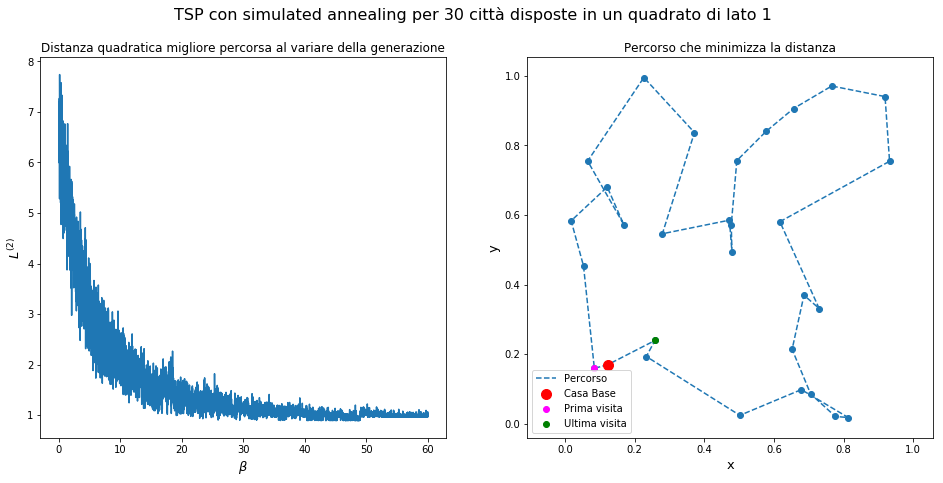

In [3]:
plt.figure(figsize=(16,7))
plt.suptitle('TSP con simulated annealing per 30 città disposte in un quadrato di lato 1',fontsize=16) 

plt.subplot(1,2,1)
L = np.loadtxt("Risultati/Exercise_10.1/distance_sq.dat", usecols=(0), unpack='true')
beta = np.linspace(0.,60.,len(L))
plt.plot(beta,L)
plt.title('Distanza quadratica migliore percorsa al variare della generazione')
plt.xlabel(r"$\beta$", fontsize = 13)
plt.ylabel(r"$L^{(2)}$", fontsize = 13)
print('Distanza minima quadratica percorsa dal commesso viaggiatore nel quadrato: ', L[len(L)-1])


plt.subplot(1,2,2)
x,y = np.loadtxt("Risultati/Exercise_10.1/path_sq.dat", usecols=(0,1), unpack='true')
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Casa Base',color = 'red', zorder = 2)
plt.scatter(x[1],y[1],label ='Prima visita',color = 'Magenta',zorder = 2)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima visita',color = 'Green',zorder = 2)
plt.title('Percorso che minimizza la distanza')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()

### Exercise 10.2

In questo esercizio ho parallelizzato il codice del *simulated annealing* per risolvere il TSP, in modo che fosse eseguito su $p = 4$ processori. Per fare ciò ho applicato degli accorgimenti e modifiche al programma:

- ho fatto in modo che prima dell'esecuzione dell'algoritmo ciascun nodo lavorasse con una stringa differente per quanto riguarda la disposizione delle città (condizione per ottenere un *Random search* efficace); ciò pè stato ottenuto con degli *shuffle* a partire da diversi valori del seme del generatore di numeri casuali. Invece le posizioni $\vec{x}$ delle città sono uguali per ogni nodo.

- ho eseguito la simulazione sui $p = 4$ nodi in modo separato. Riporto nella tabella sottostante i parametri delle simulazioni:

Disposizione |Iniziale $\beta_{i}$ | Finale $\beta_{f}$ | Passo $\Delta \beta$| Numero campionamenti $N_{a}$| Numero mutazioni $N_{m}$
-------|----------|-----------|-----------|-----------|-------|
Circonferenza|0 |60|$5\times10^{-3}$ | 150|1
Quadrato|3|60| $5\times 10^{-3}$| 150|1

- Al termine della simulazione ho fatto in modo che ciascun nodo passasse a quello centrale la propria stima della miglior distanza con annesso miglior cammino.

- Infine il nodo centrale valuta tra i dati ricevuti la $L^{(2)}$ minima e il cammino ad essa associato.

Riporto nella cella sottostante il valori di $L^{(2)}$ minima (il valore minimo confrontando i risultati di tutti i 4 nodi) ottenuti per il quadrato e circonferenza con il loro miglior cammino. Ho notato che l'esecuzione dell'algortimo parallelizzato è estremamente più veloce (richiede meno passi di campionamento $N_{a}$) di quello precedente e in più per i risultati delle distanze per entrambi i percorsi si sono rivelati migliori dell'esercizio precedente:

$$\text{Circonferenza}: \quad L^{(2)}_{\text{min}} = 3.19$$
$$\text{Quadrato}: \quad L^{(2)}_{\text{min}} = 0.89$$

Riporto infine per completezza dell'esercizio i risultati di $L^{(2)}_{\text{min}}$ ottenuti da ciascun nodo:

Disposizione |nodo 1| nodo 2| nodo 3| nodo 4 |
-------|----------|-----------|-----------|-----------|
Circonferenza|4.45|4.45|3.19 | 4.46|
Quadrato|0.95|0.89| 0.89| 0.90|

Distanza minima percorsa dal commesso viaggiatore sulla circonferenza di raggio 1:  3.18637
Distanza minima percorsa dal commesso viaggiatore nel quadrato di lato 1:  0.8944


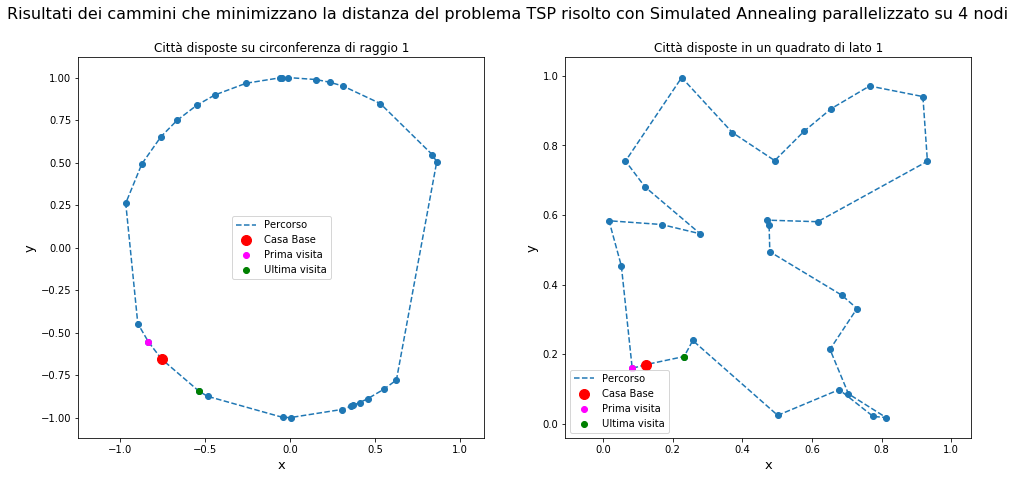

In [4]:
x1,y1 = np.loadtxt("Risultati/Exercise_10.2/path_circle.out", usecols=(0,1), unpack='true')
x,y = np.loadtxt("Risultati/Exercise_10.2/path_square.out", usecols=(0,1), unpack='true')
print('Distanza minima percorsa dal commesso viaggiatore sulla circonferenza di raggio 1: ',x1[0])
print('Distanza minima percorsa dal commesso viaggiatore nel quadrato di lato 1: ',x[0])


plt.figure(figsize=(16,7))
plt.suptitle('Risultati dei cammini che minimizzano la distanza del problema TSP risolto con Simulated Annealing parallelizzato su 4 nodi ',fontsize=16) 
plt.subplot(1,2,1)
x1 = x1[1:len(x1)]
y1 = y1[1:len(y1)]
plt.plot(x1,y1,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x1,y1,zorder=2)
plt.scatter(x1[0],y1[0],s=100,label ='Casa Base',color = 'red', zorder = 2)
plt.scatter(x1[1],y1[1],label ='Prima visita',color = 'Magenta',zorder = 2)
plt.scatter(x1[len(x1)-2],y1[len(y1)-2],label ='Ultima visita',color = 'Green',zorder = 2)
plt.title('Città disposte su circonferenza di raggio 1')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()

plt.subplot(1,2,2)
x = x[1:len(x)]
y = y[1:len(y)]
plt.plot(x,y,zorder=1,label = 'Percorso',linestyle = '--') 
plt.scatter(x,y,zorder=2)
plt.scatter(x[0],y[0],s=100,label ='Casa Base',color = 'red', zorder = 2)
plt.scatter(x[1],y[1],label ='Prima visita',color = 'Magenta',zorder = 2)
plt.scatter(x[len(x)-2],y[len(y)-2],label ='Ultima visita',color = 'Green',zorder = 2)
plt.title('Città disposte in un quadrato di lato 1')
plt.axis("equal")
plt.xlabel("x", fontsize = 13)
plt.ylabel("y", fontsize = 13)
plt.legend()
plt.show()